# Getting Started

In [1]:
%load_ext autoreload
%autoreload 2

# Example 01

## Run simulation

Reading slab_2d.1.node
Reading slab_2d.1.ele
Reading slab_2d.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.2829444408416748 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.03767538070678711 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  1.706512212753296 sec

Assembling the system of equations for line segments
Time elapsed  0.29405689239501953 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.25075483322143555 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.0348050594329834 sec

Calling sparse linear system solver
Time elapsed  0.041623592376708984 sec

Computing fields and gradients in elements
Time elapsed  0.0019931793212890625 sec



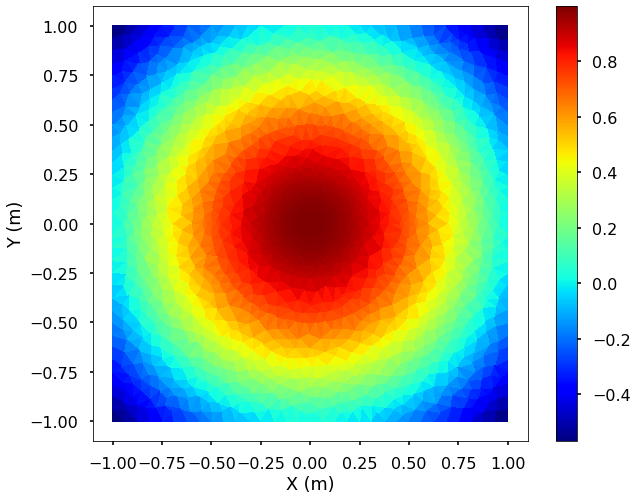

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from lib.mesh import Mesh
from lib.materials import PDE
from lib.assembly import FEM

#predefine source function
def build_f(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    f = np.zeros_like(dist)
    mask = dist>0
    f[mask] = np.pi/2.0*(1/dist[mask]*np.sin(np.pi*dist[mask]/2.0)
                         +np.pi/2.0*np.cos(np.pi*dist[mask]/2.0))
    f[~mask] = np.pi/2.0*(np.pi/2.0+np.pi/2.0)
    return f

#predefined boundary condition
def build_s(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    s = np.cos(np.pi*dist/2.0)
    return s

#import mesh
mesh = Mesh.importer(
    prefix = 'slab_2d',
    triangle = 'triangle',
    axis_symmetry = 'None',
    )

#define PDE
pde = PDE(
    c_x = {'is_inside_domain':[[1.0]]},
    c_y = {'is_inside_domain':[[1.0]]},
    f_n = {'is_on_inside_domain':[build_f]},
    s_n = {'is_on_outer_bound':[build_s]},
    )

#build FEM system
fem = FEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol)

## Validate solution

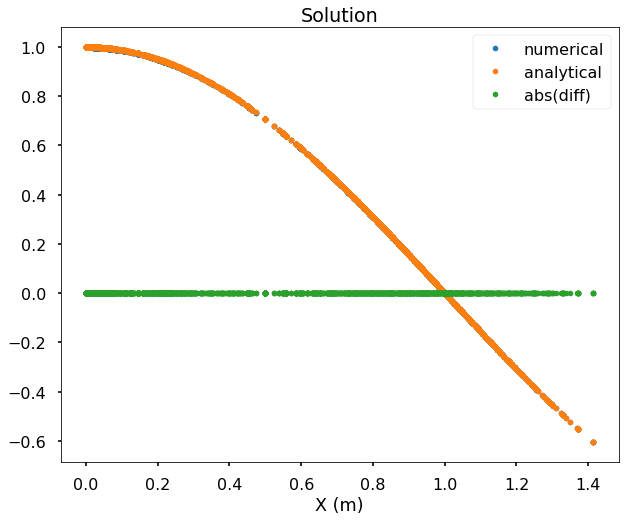

In [3]:
def display_line_real_imag():
    sol = fem.sol
    nodes = fem.mesh.nodes   
    dist = np.sqrt(nodes[:,0]**2+nodes[:,1]**2)
    ansol = np.cos(np.pi*dist/2.0)
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.plot(dist,sol,'.',color='tab:blue')
    ax.plot(dist,ansol,'.',color='tab:orange')
    ax.plot(dist,np.abs(sol-ansol),'.',color='tab:green')

    ax.set_xlabel('Distance (m)')
    ax.set_title('Solution')
    ax.legend(['numerical','analytical','abs(diff)'])
    
    plt.savefig('ex_01.png',bbox_inches='tight')
    plt.show()
    return

if __name__=='__main__':
    display_line_real_imag()

# Example 02

## Run simulation

Reading slab_2d.1.node
Reading slab_2d.1.ele
Reading slab_2d.1.edge

Computing shape functions of triangular elements
This will take a minute
Time elapsed  0.4472920894622803 sec

Computing shape functions of line segments
This will take a minute
Time elapsed  0.040334224700927734 sec

Assembling the system of equations for triangular elements
This will take a while
Time elapsed  1.9470536708831787 sec

Assembling the system of equations for line segments
Time elapsed  0.3638491630554199 sec

Incoorprating the boundary condition of the third kind
Time elapsed  0.32052183151245117 sec

Incoorprating the Dirichlet boundary condition
Time elapsed  0.035001516342163086 sec

Calling sparse linear system solver
Time elapsed  0.041533470153808594 sec

Computing fields and gradients in elements
Time elapsed  0.0043582916259765625 sec



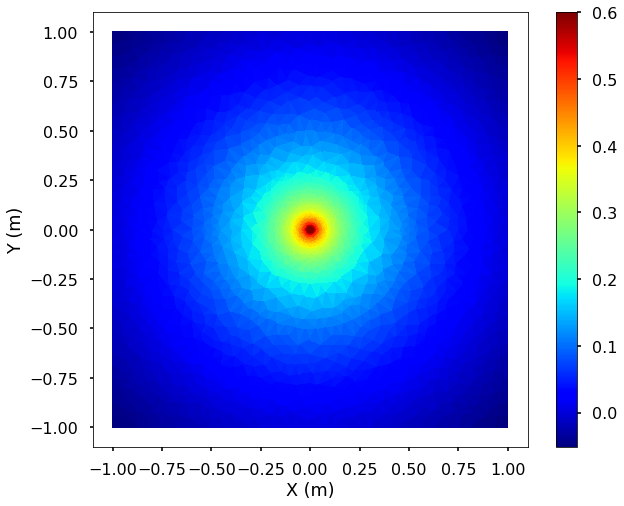

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from lib.mesh import Mesh
from lib.materials import PDE
from lib.assembly import FEM

#predefine source function
def build_f(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    f = np.zeros_like(dist)
    f[dist==0] = 1.0
    return f

#predefined boundary condition
def build_s(x,y,*args):
    dist = np.sqrt(x**2+y**2)
    s = -np.log(dist)/2/np.pi
    return s

#import mesh
mesh = Mesh.importer(
    prefix = 'slab_2d',
    triangle = 'triangle',
    axis_symmetry = 'None',
    )

#define PDE
pde = PDE(
    c_x = {'is_inside_domain':[[1.0]]},
    c_y = {'is_inside_domain':[[1.0]]},
    f_d = {'is_on_inside_domain':[build_f]},
    s_n = {'is_on_outer_bound':[build_s]},
    )

#build FEM system
fem = FEM(mesh,pde)

#display results
mesh.tripcolor(fem.sol,vmax=0.6)

## Validate solution

Computing fields and gradients in elements
Time elapsed  0.0035054683685302734 sec



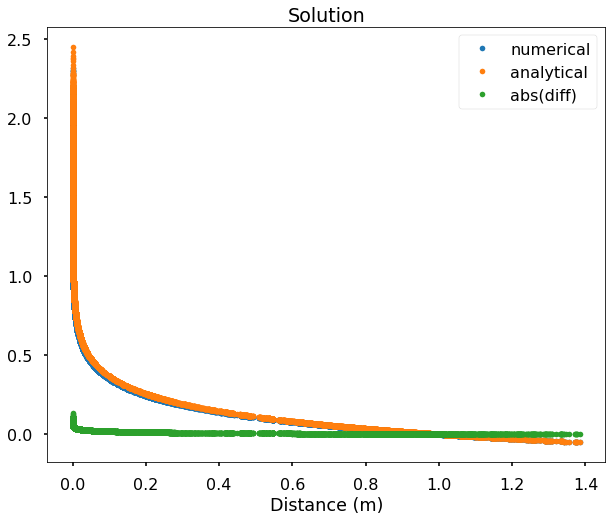

In [5]:
def display_line_real_imag():
    sol = fem.mesh.grad2d(fem.sol)[:,0]
    elem_mids = fem.mesh.elem_mids
    dist = np.sqrt(elem_mids[:,0]**2+elem_mids[:,1]**2)
    ansol = -np.log(dist)/2/np.pi
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.plot(dist,sol,'.',color='tab:blue')
    ax.plot(dist,ansol,'.',color='tab:orange')
    ax.plot(dist,np.abs(sol-ansol),'.',color='tab:green')

    ax.set_xlabel('Distance (m)')
    ax.set_title('Solution')
    ax.legend(['numerical','analytical','abs(diff)'])
    
    plt.savefig('ex_02.png',bbox_inches='tight')
    plt.show()
    return

if __name__=='__main__':
    display_line_real_imag()

# Example 03

## Run simulation

In [6]:
# slab = Complex.init_slab(
#     radius_air = 1.0, #radius of air
#     height_air = 1.0, #height of air
#     radius_water = 1.0, #radius of water
#     height_water = 0.2, #height of water
#     radius_solid = 1.0, #radius of solid
#     height_solid = 1.0, #height of solid
#     axis_symmetry = 'None', #X, or Y, or None
#     )
# slab.visualize()

# mesh = Mesh.builder(
#     prefix = 'slab_test',
#     triangle = 'triangle',
#     cpts = slab.cpts,
#     segs = slab.segs,
#     holes = slab.holes,
#     zones = slab.zones,
#     axis_symmetry = slab.axis_symmetry
#     )
# mesh.visualize()

# phys = Physics(
#     c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
#     z_ion = [-1.0,1.0], #ion valence or charge number [SI]
#     mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
#     mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
#     rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
#     rel_perm_i = 4.5, #relative permittivity of solid [SI]
#     sigma_solid = -0.01, #surface charge density for solid [C]
#     temperature = 293.0, #ambient temperature [K]
#     e_0 = [0.0,0.0], #Ex/Ey at infinity
#     f_0 = [[0.0,0.0,0.0]], #x/y/charge density at point sources
#     s_0 = 0.0, #voltage on equipotential surface
#     is_solid_metal = False, #True if solid is metal otherwise false
#     )

# #Overide mesh by import another mesh
# mesh = Mesh.importer(
#     prefix = 'slab_2d',
#     triangle = 'triangle',
#     axis_symmetry = slab.axis_symmetry,
#     )

# mesh.visualize(
#     edge_flags=[1,2,3,11,12,14],
#     elem_flags=[2,3]
#     )

# def build_f(x,y,*args):
#     dist = np.sqrt(x**2+y**2)
#     f = np.zeros_like(dist)
#     mask = dist>0
#     f[mask] = np.pi/2.0*(1/dist[mask]*np.sin(np.pi*dist[mask]/2.0)
#                          +np.pi/2.0*np.cos(np.pi*dist[mask]/2.0))
#     f[~mask] = np.pi/2.0*(np.pi/2.0+np.pi/2.0)
#     return f

# def build_s(x,y,*args):
#     dist = np.sqrt(x**2+y**2)
#     s = np.cos(np.pi*dist/2.0)
#     return s

# pde = PDE(
#     c_x = {'is_inside_domain':1.0},
#     c_y = {'is_inside_domain':1.0},
#     f_n = {'is_on_inside_domain':build_f},
#     s_n = {'is_on_outer_bound':build_s},
#     )

# domain = Domain(mesh,pde)
# stern = Stern(mesh,pde)
# robin = Robin(mesh,pde)
# dirichlet = Dirichlet(mesh,pde)

# stat = PDE.init_static(phys)
# # domain = Domain(mesh,stat)
# # stern = Stern(mesh,stat)
# # robin = Robin(mesh,stat)
# # dirichlet = Dirichlet(mesh,stat)
# print('Done')